 Here I will delve into the fascinating world of the stochastic process that serves as the cornerstone of financial mathematics. I will explore three key components: the symmetric random walk, the scaled random walk, and the illustrious Brownian motion. My primary source for mathematical notation and explanations is Steven Shreve's renowned book, "Stochastic Calculus for Finance II."

In [1]:
import math
import itertools
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Symmmetric Random Walk

Consider successive coin tosses, where $\omega = \omega_1 \omega_2 \omega_3 \ldots$ and $\omega_n$ is the outcome of the $n^{th}$ toss.

Define a random variable $X_j$ as follows:
$$
X_j =
\begin{cases}
    1 & \text{if } \omega_j = H \\
   -1 & \text{if } \omega_j = T
\end{cases}
$$

Now, if we define $M_0 = 0$, we can calculate $M_k$ as the cumulative sum of $X_j$ up to $k$:
$$
M_k = \sum_{j=1}^{k} X_j


In [54]:
# Parameters
M = 10 # number of simulations
t = 15 # Time


In [55]:
random_walk = [-1, 1]
steps = np.random.choice(random_walk, size=(M,t)).T
origin = np.zeros((1,M))
rw_paths = np.concatenate([origin, steps]).cumsum(axis=0)

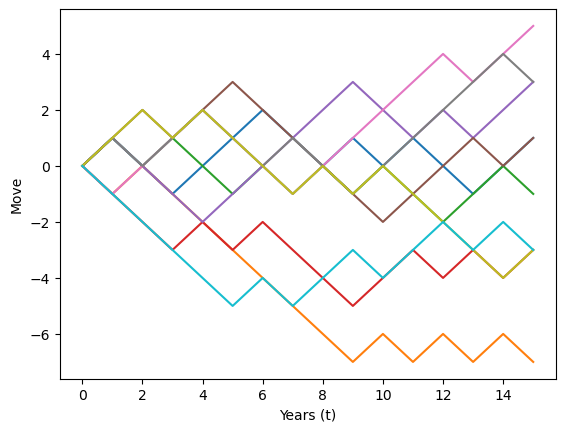

In [56]:
plt.plot(rw_paths)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()

# Properties of a Symmetric Random Walk

1. **Independent Increments**
   - Consider a sequence of time points: 
     $0 = k_0 < k_1 < k_2 < \ldots < k_m$
   - Define the increments 
     
     $M_{k_1} = (M_{k_1} - M_{k_0}), (M_{k_2} - M_{k_1}), \ldots, (M_{k_m} - M_{k_{m-1}})`$

   - The increments $M_{k_i+1} - M_{k_i}$ are independent of each other.

   - The expected value of these increments is zero:
   
      $E(M_{k_i+1} - M_{k_i}) = 0$
   - The variance of these increments is proportional to the time intervals:
   
        $Var(M_{k_i+1} - M_{k_i}) = k_{i+1} - k_i$
   - Variance accumulates at a rate of one per unit time.


2. **Martingale**

   - The conditional expectation of the next value in the sequence is equal to the current position.

   - For time intervals $0 < k < l < T$, consider $E[\ldots | F_k]$,
   
    where $E[\ldots | F_k]$ is the conditional expectation based on information up to time $k$. 
    
    Here, $F_k$ represents a filtration, which is the $\sigma$-algebra of information corresponding to the first $k$ coin tosses.
    
   - The equation is as follows:
   
     $E[M_l | F_k] = $
     
     $E[(M_l - M_k) + M_k | F_k] = $
     
     $E[(M_l - M_k) | F_k] + E[M_k | F_k] = $
     
     $E[(M_l - M_k) | F_k] + M_k = M_k$


3. **Quadratic Variation**

   Quadratic variation is computed path-by-path, one increment at a time. For a given stochastic process $M_t$, the quadratic variation $[M, M]_k$ is defined as the sum of squared increments from time $0$ to $k$. In other words:
   
   $ [M, M]_k = \sum_{j=1}^k (M_j - M_{j-1})^2 = k $

   This expression represents the quadratic variation of the process up to time $k$, calculated as the sum of squared differences between consecutive values, and it is directly proportional to the length of the time interval $k$.


In [59]:
# Create Quadratic variation and Variance functions 
quadratic_variation = lambda x: round(np.square(x[:-1]-x[1:]).sum(),3)
variance = lambda x: round(np.var(x,axis=0),3)
[quadratic_variation(path) for path in rw_paths.T[:4]]
# Change the number of simulation to 10,000,000 to observe variance convergence on Time
[variance(path) for path in rw_paths[1:11]]

[0.96, 1.6, 2.44, 4.36, 5.44, 4.04, 5.16, 5.76, 7.84, 6.56]

# Scaled Symmmetric Random Walk

To approximate a Brownian Motion, we can speed up time and scale down the step size. This approximation can be represented as:

$W^{(n)}(t) = \frac{1}{\sqrt{n}} \cdot \sqrt{M_nt}$

Here, $W^{(n)}(t)$ represents the approximate Brownian Motion at time $t$ with scaled time and step size. The term $\frac{1}{\sqrt{n}}$ scales down the step size, while $\sqrt{M_nt}$ represents the scaled time. This approach allows for a finer-grained approximation by increasing the number of steps $n$ and reducing the step size.


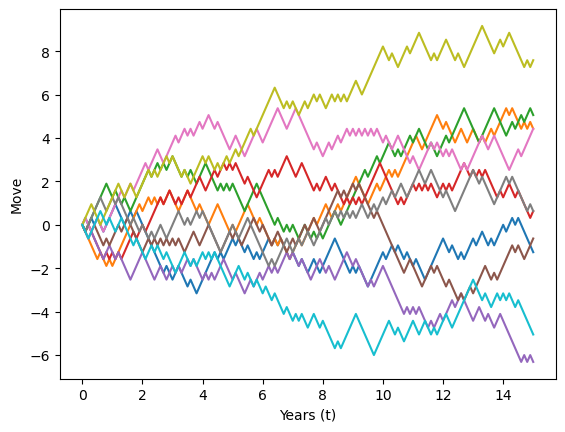

[15.0, 15.0, 15.0, 15.0]

In [66]:

# Parameters
M = 10 # number of simulations
t = 15 # Time
n = 10
random_walk = [-1, 1]
steps = (1/np.sqrt(n)) * np.random.choice(random_walk, size=(M,t*n)).T
origin = np.zeros((1,M))
srw_paths = np.concatenate([origin, steps]).cumsum(axis=0)
time = np.linspace(0,t,t*n+1)
tt = np.full(shape=(M, t*n+1), fill_value=time)
tt = tt.T
# print(np.size(tt),np.size(srw_paths))
plt.plot(tt,srw_paths)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()
# Change the number of simulation to 100,000 to observe variance convergence on Time
[variance(path) for path in srw_paths[1:11]]
[quadratic_variation(path) for path in srw_paths.T[:4]]

# Limit of Binomial Distribution

As $n$ increases, the binomial distribution converges to the normal distribution with variance $t$. This relationship can be represented as:

$W^{(n)}(t) = \frac{1}{\sqrt{n}} \cdot \sqrt{M_nt}$

This is a fundamental concept in the context of stochastic processes and the central limit theorem.


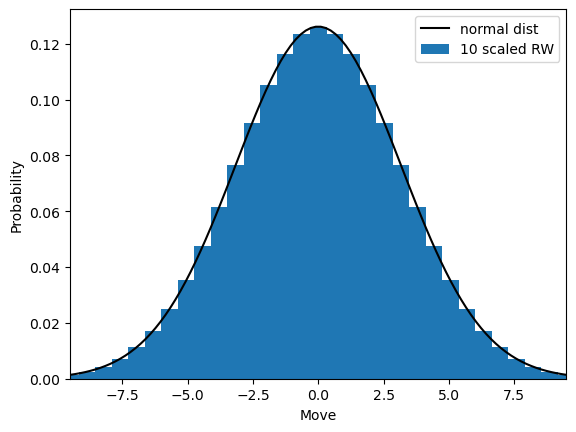

In [74]:
# Change the parameter n to see the impact of increasing the discretization
# of the random walk and how it converges on the normal distribution
n = 10
t = 10
# Combinations
def nCr(n,k):
    f = math.factorial
    return f(n) / (f(k) * f(n-k))
perms = [nCr(n*t,k)*(0.5)**(n*t) for k in range(int(n*t)+1)]
W_nt = lambda n,t: 1/np.sqrt(n) * np.arange(-n*t,n*t+1,2)
outcomes = W_nt(n,t)
plt.bar(outcomes,[perm/(outcomes[1]-outcomes[0]) for perm in perms],outcomes[1]-outcomes[0], 
        label='{0} scaled RW'.format(n))
x = np.linspace(-3*np.sqrt(t), 3*np.sqrt(t), 100)
plt.plot(x, stats.norm.pdf(x, 0, np.sqrt(t)), 'k-',label='normal dist')
plt.xlim(-3*np.sqrt(t),3*np.sqrt(t))
plt.ylabel("Probability")
plt.xlabel("Move")
plt.legend()
plt.show()

# Brownian Motion

A Brownian motion is a stochastic process 
$\{W_t\}_{t\in[0,T]}$.

Filtered probability space 
$(\Omega, \mathcal{F}, \mathbb{P}, \{\mathcal{F}_t\}_{t \in [0, T]})$.

$W: [0, T] \times \Omega \to \mathbb{R}$

1. $W_0 = 0$
2. W has independent increments
3. W has Gaussian (normal) increments
4. W has continuous sample paths (almost surely).



- From limit of binomial distribution*

As $n$ approaches infinity, the approximation $W^{(n)}(t)$ converges to a normal distribution with mean 0 and variance $t$. This convergence can be expressed as:

$
\lim_{{n \to \infty}} W^{(n)}(t) \sim \mathcal{N}(0, t)
$



For a standard Brownian Motion, $W_t \sim \mathcal{N}(0, t)$, meaning that at each time point $t$, $W_t$ follows a normal distribution with mean 0 and variance $t$.

Additionally, for adjacent time points $t_i$ and $t_{i+1}$:
- The expected change in the value, $E(W_{t_{i+1}} - W_{t_i})$ is 0. This reflects the fact that Brownian Motion is a martingale, and the expected change at each time step is zero.

- The variance of the change in value, $Var(W_{t_{i+1}} - W_{t_i})$, is equal to the time difference $t_{i+1} - t_i$. This reflects the property of Brownian Motion where the variance accumulates linearly with time, making it a useful tool in stochastic calculus.


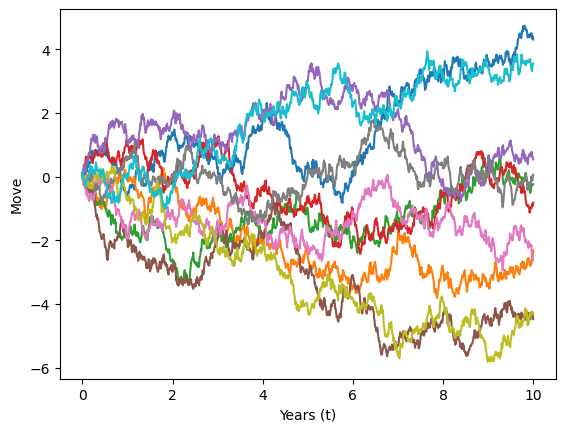

[0.011, 0.015, 0.042, 0.039, 0.027, 0.04, 0.043, 0.077, 0.102, 0.099]

In [76]:
# Parameters
M = 10 # number of simulations
t = 10 # Time
n = 1000# steps we want to see
dt = t/n # time step
steps = np.random.normal(0, np.sqrt(dt), size=(M, n)).T
origin = np.zeros((1,M))
bm_paths = np.concatenate([origin, steps]).cumsum(axis=0)
time = np.linspace(0,t,n+1)
tt = np.full(shape=(M, n+1), fill_value=time)
tt = tt.T
plt.plot(tt,bm_paths)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()
# change time steps to 1,000,000 to observe same quadratic variation along paths
[quadratic_variation(path) for path in bm_paths.T[:4]]
# change simulations to 100,000 to observe convergence of variance to Time at a particular time step
[variance(path) for path in bm_paths[1:11]]